In [1]:
import requests
import pandas as pd
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from matplotlib.ticker import *
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rcParams['figure.figsize'] = (14.0, 7.0)
plt.rcParams['font.family'] = ['Arial Unicode MS'] 

In [2]:
df = pd.read_csv('data.csv')
df['xq'] =  df["xnmmc"].apply(str) + '-' + df["xqmmc"].apply(str)
df.sort_values(by=['xq', 'kch'], inplace=True)
df.head()

,kch,kcmc,bfzcj,type,kcbj,xf,kcgsmc,kcxzmc,khfsmc,kkbmmc,xqmmc,xnmmc,xq
0,003360,西方文明通论,99.4,通识课,主修,2.0,美育教育类,院公选课,考查,网络课程,1,2019-2020,2019-2020-1
1,003551,经济学原理（上）：中国故事,95.7,通识课,主修,2.0,人文社会科学类,院公选课,考查,网络课程,1,2019-2020,2019-2020-1
2,B0021001,军事理论,78.0,通识课,主修,2.0,NaN,必修课,NaN,学生处（校友工作和教育发展基金管理处）,1,2019-2020,2019-2020-1
7,B0041006,校规校纪与安全教育,99.0,通识课,主修,1.0,NaN,必修课,考试,学生处（校友工作和教育发展基金管理处）,1,2019-2020,2019-2020-1
9,B0041007,军事训练,80.0,通识课,主修,2.0,NaN,必修课,考查,学生处（校友工作和教育发展基金管理处）,1,2019-2020,2019-2020-1


In [3]:
data = df.groupby(["xq"])["bfzcj"].mean()
data

xq
2019-2020-1    89.776923
2019-2020-2    91.400000
2020-2021-1    90.529412
2020-2021-2    88.312500
2021-2022-1    93.583333
Name: bfzcj, dtype: float64

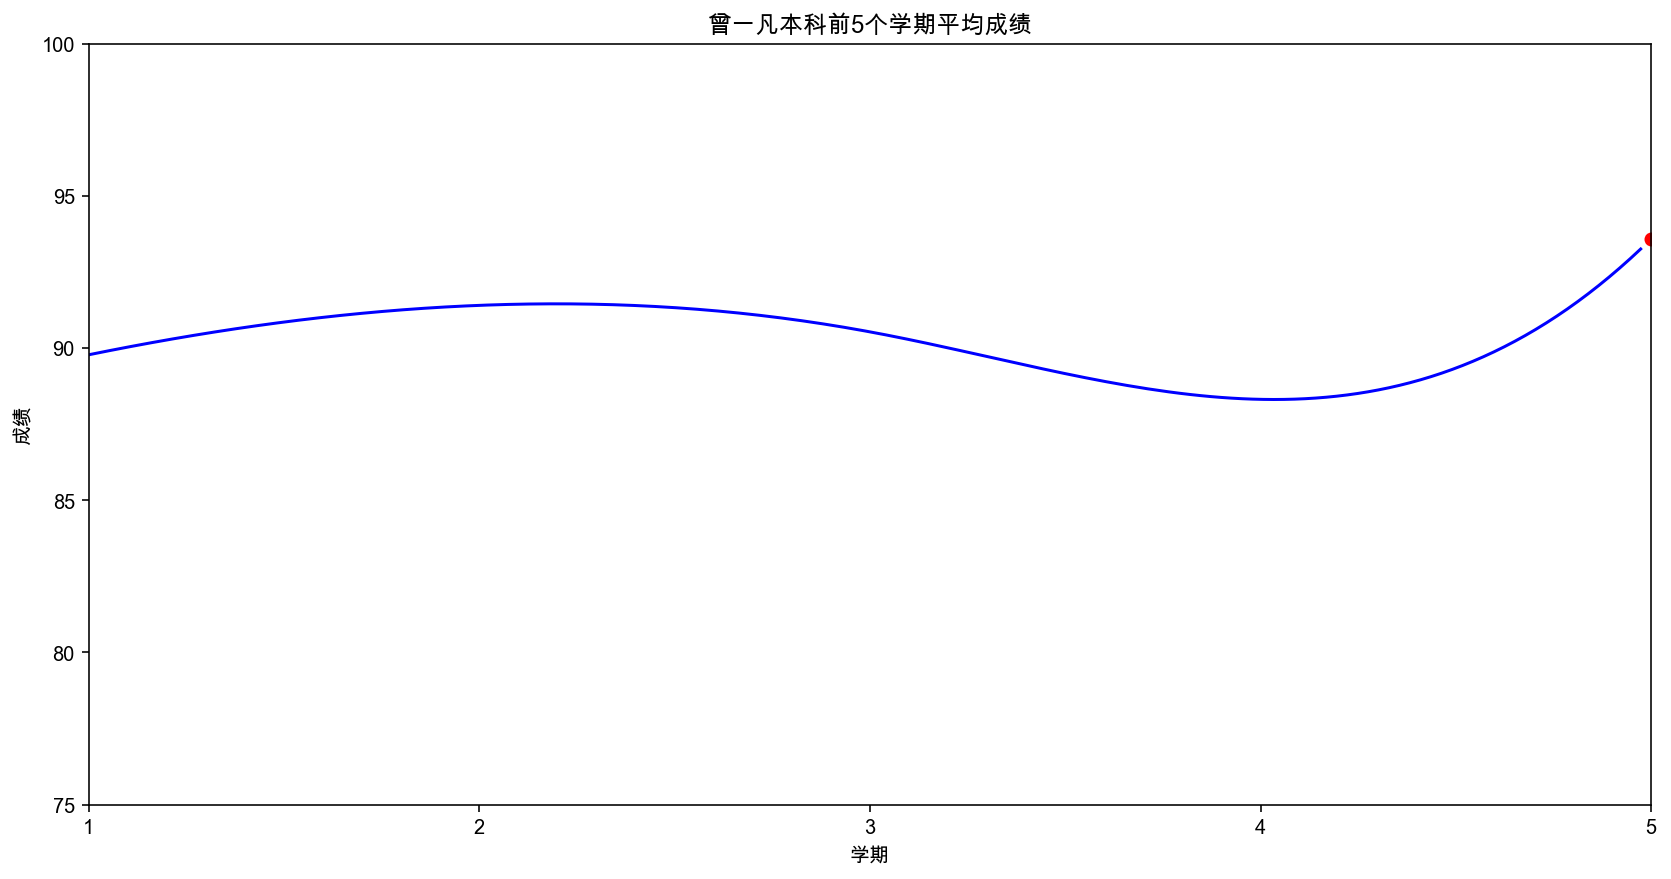

In [6]:
fig = plt.figure()
l2, = plt.plot([], [], 'b-')
p2, = plt.plot([], [], 'ro')
plt.xlabel('学期')
plt.ylabel('成绩')
plt.title('曾一凡本科前5个学期平均成绩')
plt.xlim(1, 5)
plt.ylim(75, 100)
def func2(x):
    return scipy.interpolate.make_interp_spline(range(1,6), data.values)(x)
writer = animation.PillowWriter(fps=15)
xlist = []
ylist = []
with writer.saving(fig, "avg_score_dynamic.gif", 310):
    for xval in np.linspace(1, 5, 150):
        l2.set_data(xlist, ylist)
        writer.grab_frame()
        xlist.append(xval)
        ylist.append(func2(xval))
        p2.set_data(xval, func2(xval))
        ax = plt.gca()
        ax.xaxis.set_major_locator(MultipleLocator(1))

动图生成于当前目录下 `avg_score_dynamic.gif`，请手动打开